## Quick Links
* [Data Preprocessing](#data-preprocess)
* [Training and Test Sets](#train-test)
* [Feature Scaling](#feature-scaling)
* [K Nearest Neighbors Regression](#knn)
* [Random Forest Regression](#rfr)
* [Ridge Regression](#ridge)
* [Kernelized Ridge Regression](#kridge)
* [Comparing Our Models](#compare)
* [On-line Prediction](#online)

## Necessary Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split

## Loading the Dataset

In [2]:
ames = pd.read_csv('./Datasets/Ames Housing Dataset/AmesHousing.csv')

In [3]:
# The following code helps us to display all the columns which are otherwise truncated by Pandas
pd.set_option('display.max_columns', None)

In [4]:
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Shape of the Dataset

In [5]:
ames.shape

(2930, 82)

## Checking the Stats of the Dataset

In [6]:
ames.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

<a id='data-preprocess'></a>
## Handling Missing Values

In [8]:
pd.DataFrame(ames.isna().sum()).transpose() # Shows the number of missing values for each column

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,0,0,0,490,0,0,2732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,23,0,0,0,80,80,83,80,1,81,1,1,1,0,0,0,1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1422,157,159,159,1,1,159,159,0,0,0,0,0,0,0,2917,2358,2824,0,0,0,0,0,0


In [9]:
## Filling the missing values in Pool QC column with 'NP' meaning that the house has no pool
ames['Pool QC'].fillna('Np', inplace=True)

In [10]:
ames['Pool QC'].unique()

array(['Np', 'Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [11]:
ames['Misc Feature'].value_counts()

Shed    95
Gar2     5
Othr     4
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [12]:
## Filling the missing values in Misc Feature column with 'None' meaning that the house has no miscellaneous features
ames['Misc Feature'].fillna('None', inplace=True)

In [13]:
ames['Misc Feature'].unique()

array(['None', 'Gar2', 'Shed', 'Othr', 'Elev', 'TenC'], dtype=object)

In [14]:
ames['Alley'].fillna('No Alley', inplace = True)
ames['Fence'].fillna('No Fence', inplace = True)
ames['Fireplace Qu'].fillna('No Fireplace', inplace = True)

In [15]:
ames['Lot Frontage'].fillna(0.0, inplace = True)

In [16]:
# Getting the columns that begin with Garage
garage_columns = [c for c in ames.columns if c.startswith('Garage')]
garage_columns

['Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

In [17]:
ames[garage_columns].isna().sum()

Garage Type      157
Garage Yr Blt    159
Garage Finish    159
Garage Cars        1
Garage Area        1
Garage Qual      159
Garage Cond      159
dtype: int64

In [18]:
ames['Garage Cars'].fillna(0, inplace = True)
ames['Garage Area'].fillna(0.0, inplace = True)

In [19]:
for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    ames[col].fillna('No Garage', inplace=True)
 

In [20]:
ames['Garage Yr Blt'].fillna(0, inplace=True)

In [21]:
# Getting the columns that begin with Bsmt
bsmt_columns = [c for c in ames.columns if c.startswith('Bsmt')]
bsmt_columns

['Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

In [22]:
for col in ['Bsmt Half Bath', 'Bsmt Full Bath', 'Total Bsmt SF','Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1']:
    ames[col].fillna(0, inplace = True)

In [23]:
for col in ['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond']:
    ames[col].fillna('No Basement', inplace=True)

In [24]:
ames['Mas Vnr Area'].fillna(0, inplace = True)
ames['Mas Vnr Type'].fillna('None', inplace = True)

In [25]:
ames['Electrical'].fillna(ames['Electrical'].mode()[0], inplace=True)

In [26]:
ames.isna().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

## Removing Unnecessary Columns

In [27]:
ames.drop(columns=['Order', 'PID'], axis = 1, inplace = True)

In [28]:
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,Np,No Fence,None,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No Fireplace,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Np,MnPrv,None,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Np,No Fence,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,No Alley,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,Np,No Fence,None,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Np,MnPrv,None,0,3,2010,WD,Normal,189900


## Relationship Between Different Features and with the Label

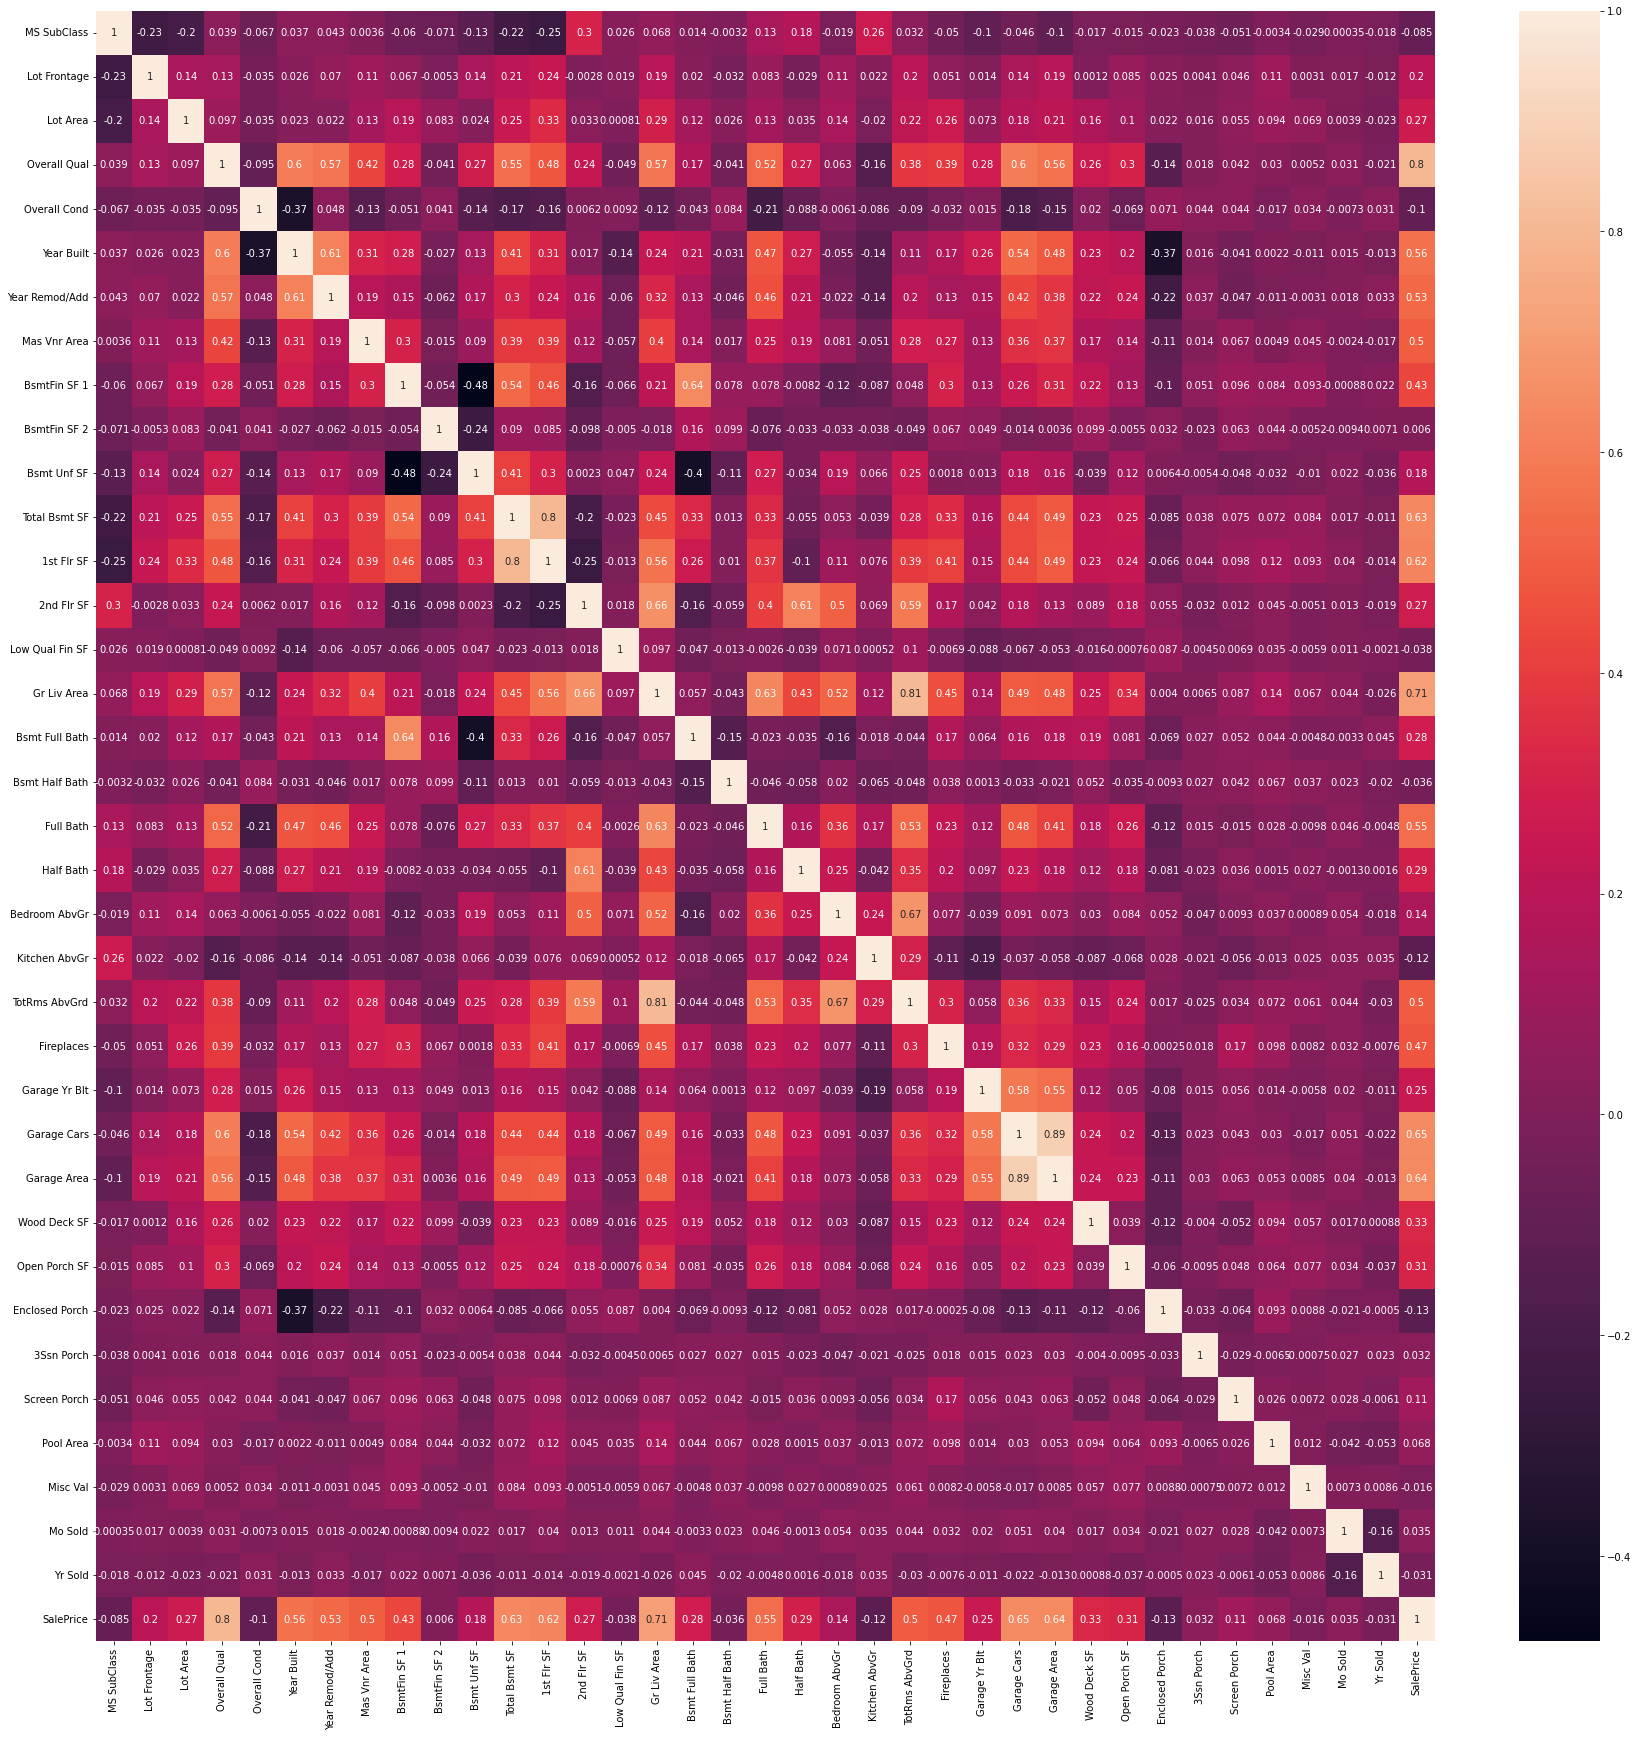

In [29]:
fig, ax = plt.subplots(figsize=(30,30))
ax = sns.heatmap(ames.corr(),annot=True);

## Handling Ordinal Variables

In [30]:
ordinal_mapping_1 = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}

ames['Exter Cond'] = ames['Exter Cond'].map(ordinal_mapping_1)
ames['Exter Qual'] = ames['Exter Qual'].map(ordinal_mapping_1)
ames['Kitchen Qual'] = ames['Kitchen Qual'].map(ordinal_mapping_1)
ames['Heating QC'] = ames['Heating QC'].map(ordinal_mapping_1)

In [31]:
ordinal_mapping_2 = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Basement':0}

ames['Bsmt Cond'] = ames['Bsmt Cond'].map(ordinal_mapping_2)
ames['Bsmt Qual'] = ames['Bsmt Qual'].map(ordinal_mapping_2)

In [32]:
ames['Bsmt Exposure'] = ames['Bsmt Exposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'No Basement':0})

In [33]:
ordinal_mapping_3 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'No Basement':0}

ames['BsmtFin Type 1'] = ames['BsmtFin Type 1'].map(ordinal_mapping_3)
ames['BsmtFin Type 2'] = ames['BsmtFin Type 2'].map(ordinal_mapping_3)

In [34]:
ordinal_mapping_4 = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Garage':0}

ames['Garage Qual'] = ames['Garage Qual'].map(ordinal_mapping_4)
ames['Garage Cond'] = ames['Garage Cond'].map(ordinal_mapping_4)

In [35]:
ames['Garage Finish'] = ames['Garage Finish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'No Garage':0})
ames['Land Slope'] = ames['Land Slope'].map({'Sev':2, 'Mod':1, 'Gtl':0})
ames['Pool QC'] = ames['Pool QC'].map({'Ex': 4, 'Gd':3, 'TA':2, 'Fa':1, 'Np':0})
ames['Fireplace Qu'] = ames['Fireplace Qu'].map({'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Fireplace':0})
ames['Fence'] = ames['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'No Fence':0})
ames['Functional'] = ames['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
ames['Central Air'] = ames['Central Air'].map({'Y':1, 'N':0})

In [36]:
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,No Alley,IR1,Lvl,AllPub,Corner,0,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,2,2,CBlock,3,4,4,4,639.0,1,0.0,441.0,1080.0,GasA,1,1,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,2,7,7,2,4,Attchd,1960.0,3,2.0,528.0,3,3,P,210,62,0,0,0,0,0,0,None,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,No Alley,Reg,Lvl,AllPub,Inside,0,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,3,3,1,3,468.0,2,144.0,270.0,882.0,GasA,2,1,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,2,5,7,0,0,Attchd,1961.0,1,1.0,730.0,3,3,Y,140,0,0,0,120,0,0,3,None,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,No Alley,IR1,Lvl,AllPub,Corner,0,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,2,2,CBlock,3,3,1,5,923.0,1,0.0,406.0,1329.0,GasA,2,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,0,Attchd,1958.0,1,1.0,312.0,3,3,Y,393,36,0,0,0,0,0,0,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,No Alley,Reg,Lvl,AllPub,Corner,0,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,3,2,CBlock,3,3,1,5,1065.0,1,0.0,1045.0,2110.0,GasA,4,1,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,4,8,7,2,3,Attchd,1968.0,3,2.0,522.0,3,3,Y,0,0,0,0,0,0,0,0,None,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,No Alley,IR1,Lvl,AllPub,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,6,791.0,1,0.0,137.0,928.0,GasA,3,1,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,2,6,7,1,3,Attchd,1997.0,3,2.0,482.0,3,3,Y,212,34,0,0,0,0,0,3,None,0,3,2010,WD,Normal,189900


In [37]:
ames = pd.get_dummies(ames)

In [38]:
ames.head()

,MS SubClass,Lot Frontage,Lot Area,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Fa

## Splitting the Data into Features (X) and Target (y)

In [39]:
X_ames = ames.drop('SalePrice', axis = 1)

In [40]:
y_ames = ames['SalePrice']

<a id='train-test'></a>
## Splitting the Data into Training and Test Sets

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ames, y_ames, random_state=42)

<a id='feature-scaling'></a>
## Normalizing the dataset using StandardScaler

In [42]:
n = X_ames.columns.get_loc('Yr Sold') + 1

In [43]:
n

54

In [44]:
X_train.iloc[:,:n]

,MS SubClass,Lot Frontage,Lot Area,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold
844,20,68.0,9017,0,7,5,1999,1999,0.0,3,2,4,3,3,6,560.0,1,0.0,871.0,1431.0,4,1,1431,0,0,1431,1.0,0.0,2,0,3,1,3,6,7,0,0,1999.0,3,2.0,666.0,3,3,0,35,0,0,0,0,0,0,0,9,2009
2730,150,0.0,1700,0,7,5,1980,1981,0.0,3,2,4,3,2,6,397.0,1,0.0,33.0,430.0,2,1,880,680,140,1700,1.0,0.0,2,1,2,1,3,7,7,0,0,1980.0,3,1.0,450.0,4,3,188,36,0,0,200,0,0,0,0,4,2006
2793,20,0.0,14781,0,8,5,2001,2002,178.0,3,2,4,3,4,1,0.0,1,0.0,1753.0,1753.0,4,1,1787,0,0,1787,0.0,0.0,2,0,3,1,3,7,7,1,3,2001.0,2,3.0,748.0,3,3,198,150,0,0,0,0,0,0,0,8,2006
1187,20,85.0,11050,0,6,5,1968,1968,0.0,2,2,3,3,1,3,301.0,1,0.0,1439.0,1740.0,1,1,1740,0,0,1740,0.0,0.0,1,1,4,1,2,8,7,1,3,1968.0,2,2.0,512.0,3,3,25,0,0,0,192,0,0,2,0,10,2008
2770,60,65.0,12438,0,6,5,1995,1995,68.0,3,2,4,3,1,1,0.0,1,0.0,781.0,781.0,4,1,795,704,0,1499,0.0,0.0,2,1,3,1,3,6,7,1,3,1995.0,2,2.0,473.0,3,3,413,91,0,0,0,0,0,0,0,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,190,195.0,41600,0,5,5,1969,1990,0.0,2,2,4,3,4,5,1047.0,1,0.0,53.0,1100.0,2,1,1424,0,0,1424,1.0,0.0,1,1,3,1,2,7,4,0,0,1969.0,1,3.0,828.0,3,3,144,0,0,0,0,0,0,0,0,11,2007
1095,60,0.0,7750,0,7,5,2002,2002,0.0,3,2,4,3,1,1,0.0,1,0.0,707.0,707.0,4,1,707,707,0,1414,0.0,0.0,2,1,3,1,3,6,7,1,4,2002.0,3,2.0,403.0,3,3,100,35,0,0,0,0,0,0,0,4,2008
1130,60,64.0,8791,0,6,5,2003,2003,0.0,3,2,4,3,1,3,503.0,1,0.0,361.0,864.0,4,1,864,864,0,1728,0.0,0.0,2,1,3,1,3,7,7,0,0,2003.0,2,2.0,673.0,3,3,216,56,0,0,0,0,0,0,0,5,2008
1294,50,81.0,7308,0,5,5,1920,1950,0.0,1,1,3,3,1,3,360.0,1,0.0,576.0,936.0,3,0,960,780,0,1740,0.0,0.0,1,0,2,1,4,6,7,1,4,1920.0,1,1.0,225.0,2,2,0,0,236,0,0,0,0,0,0,6,2008


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:, :n])

StandardScaler()

In [46]:
def custom_transform(X):
    X_copy = np.copy(X)
    X_copy[:, :n] = scaler.transform(X_copy[:, :n])
    return X_copy

In [47]:
X_train_scaled = custom_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [48]:
X_train_scaled_df

,MS SubClass,Lot Frontage,Lot Area,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale 

In [49]:
X_test_scaled = custom_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [50]:
y_train.reset_index(drop = True, inplace=True)
y_test.reset_index(drop = True, inplace=True)

<a id='knn'></a>
## Fitting K Nearest Neighbors Regression Model to the Dataset

In [51]:
from KNN import KNNRegressor

### Searching for best parameters

In [52]:
best_score = 0.0
best_n_neighbors = 1
best_distance_func = 2
best_weighted = False

n_neighbors = range(1, 11)

start = time.time()
for n in n_neighbors:
    for d in [1,2]:
        for w in [True, False]:
            # Build the model
            knn = KNNRegressor(n_neighbors = n, distance_type = d, weighted = w)
            knn.fit(X_train_scaled_df, y_train)
            current_score = knn.score(X_test_scaled_df, y_test)
            if current_score > best_score:
                best_score = current_score
                best_n_neighbors = n
                best_distance_func = d
                best_weighted = w
                
print(f'\nThat took {np.round((time.time() - start)/60)} minute(s).')                
print(f'\nBest value for n_neighbors: {best_n_neighbors}')
print(f'Best distance function: {best_distance_func}')
print(f'Weighted: {best_weighted}')
print(f'Best Score: {best_score}')

KNNRegressor(n_neighbors=1, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=1, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=1, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=1, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=4, dista

In [53]:
knn_score = best_score
knn_score

0.8672412854684298

### How the scores change with respect to the number of neighbors

In [54]:
train_score = []
test_score = []

neighbors = range(1, 11)

start = time.time()
for n in neighbors:
    # Build the model
    knn = KNNRegressor(n_neighbors=n, distance_type = best_distance_func, weighted = best_weighted)
    knn.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(knn.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(knn.score(X_test_scaled_df, y_test))
    
print(f'That took {np.round((time.time() - start)/60)} minute(s).')

KNNRegressor(n_neighbors=1, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=5, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=6, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=7, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=8, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=9, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=10, distance_type = 1, weighted = True)
That took 8.0 minute(s).


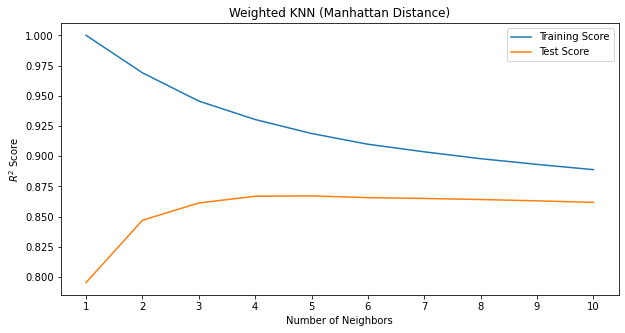

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(n_neighbors, train_score, label = 'Training Score')
ax.plot(n_neighbors, test_score, label = 'Test Score')
ax.set(xlabel = 'Number of Neighbors',
       ylabel = '$R^2$ Score',
       xticks = n_neighbors,
       title = 'Weighted KNN (Manhattan Distance)')
ax.legend();

<a id='rfr'></a>
## Using Random Forest Regression

In [56]:
# Maximum number of features to consider at each node
p = int(np.ceil(X_train.shape[1]/3))

In [57]:
from RFR import RandomForestRegressor

### Searching for the model with the best parameters and best score

In [58]:
best_score = 0.0
best_min_samples_split = 5
best_max_depth = 5

samples = [5, 50, 100, 150]
depths = [10, 15, 20, 25]

start = time.time()
for s in samples:
    for d in depths:
        # Build the model
        rf = RandomForestRegressor(n_estimators = 100, min_samples_split = s, max_depth = d, max_features = p)
        rf.fit(X_train_scaled_df, y_train)
        current_score = rf.score(X_test_scaled_df, y_test)
        if current_score > best_score:
            best_score = current_score
            best_min_samples_split = s
            best_max_depth = d
                
print(f'That took {np.round((time.time() - start)/60)} minute(s).')
        
print(f'\nBest value for min_samples_split: {best_min_samples_split}')
print(f'Best value for max_depth: {best_max_depth}')
print(f'Best Score: {best_score}')

That took 82.0 minute(s).

Best value for min_samples_split: 5
Best value for max_depth: 20
Best Score: 0.9138114734441379


In [59]:
rf_score = best_score
rf_score

0.9138114734441379

### $R^2$ Scores with varying min_samples_split

In [60]:
train_score = []
test_score = []

samples = [5, 50, 100, 150]

start = time.time()
for s in samples:
    # Build the model
    rf = RandomForestRegressor(n_estimators = 100, 
                               min_samples_split = s, 
                               max_depth = best_max_depth, 
                               max_features=p)
    rf.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(rf.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(rf.score(X_test_scaled_df, y_test))
    
print(f'That took {np.round((time.time() - start)/60)} minute(s).')

That took 21.0 minute(s).


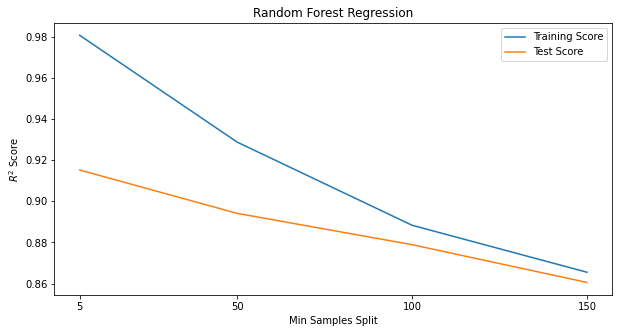

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(samples, train_score, label = 'Training Score')
ax.plot(samples, test_score, label = 'Test Score')
ax.set(xlabel = 'Min Samples Split',
       ylabel = '$R^2$ Score',
       xticks = samples,
       title = 'Random Forest Regression')
ax.legend();

### $R^2$ Scores with varying max_depth

In [62]:
train_score = []
test_score = []

depths = [10, 15, 20, 25]

start = time.time()
for d in depths:
    # Build the model
    rf = RandomForestRegressor(n_estimators = 100, 
                               min_samples_split = best_min_samples_split, 
                               max_depth = d, 
                               max_features = p)
    rf.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(rf.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(rf.score(X_test_scaled_df, y_test))

print(f'That took {np.round((time.time() - start)/60)} minute(s).')

That took 38.0 minute(s).


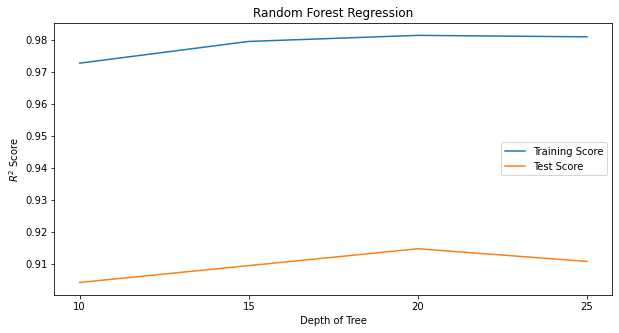

In [63]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(depths, train_score, label = 'Training Score')
ax.plot(depths, test_score, label = 'Test Score')
ax.set(xlabel = 'Depth of Tree',
       ylabel = '$R^2$ Score',
       xticks = depths,
       title = 'Random Forest Regression')
ax.legend();

<a id='ridge'></a>
## Using Ridge Regression

In [64]:
from RR import RidgeRegression

In [65]:
best_score = 0.0
best_alpha = 1

alphas = [0.1, 1, 10, 50, 100, 1000]

for a in alphas:
    rr = RidgeRegression(alpha = a)
    rr.fit(X_train_scaled_df, y_train)
    current_score = rr.score(X_test_scaled_df, y_test)
    if current_score > best_score:
        best_score = current_score
        best_alpha = a
        
print(f'\nBest value of alpha: {best_alpha}')
print(f'Best Score: {best_score}')


Best value of alpha: 10
Best Score: 0.8819893181169245


In [66]:
rr_score = best_score
rr_score

0.8819893181169245

### Checking $R^2$ Scores for Different Alphas

In [67]:
train_score = []
test_score = []

alphas = [0.1, 1, 10, 50, 100, 1000]

for alpha in alphas:
    # Build the model
    reg = RidgeRegression(alpha = alpha)
    reg.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(reg.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(reg.score(X_test_scaled_df, y_test))

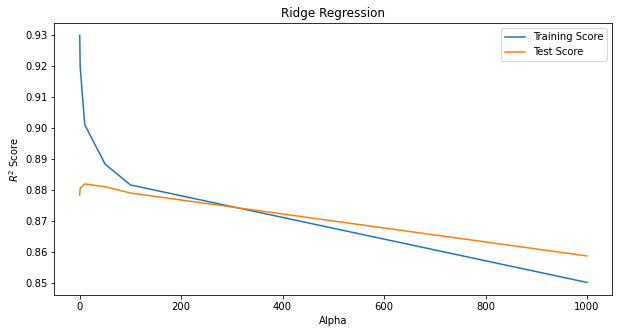

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alphas, train_score, label = 'Training Score')
ax.plot(alphas, test_score, label = 'Test Score')
ax.set(xlabel = 'Alpha',
       ylabel = '$R^2$ Score',
       title = 'Ridge Regression')
ax.legend();

### Weights for the Features

In [69]:
rr.coef_

array([-3.34761150e+03,  1.33032197e+03,  2.72838411e+03,  1.23427604e+03,
        1.03695865e+04,  2.81838818e+03,  2.84417541e+03,  1.97180898e+03,
        4.74042159e+03,  6.37045095e+03,  6.76032167e+01,  3.97631179e+03,
       -2.06294980e+03,  4.19341916e+03,  2.54660943e+03,  3.72257166e+03,
       -9.23549740e+01,  1.08745832e+03, -1.02102140e+02,  4.14840060e+03,
        2.30110615e+03,  3.15602720e+02,  5.83034375e+03,  5.06372798e+03,
       -4.62539887e+01,  8.67460461e+03,  2.37229297e+03, -7.93582352e+02,
        3.44352352e+03,  1.71328711e+03, -2.66410385e+01, -1.90736431e+03,
        6.37985178e+03,  3.64104511e+03,  1.98344064e+03,  2.49865494e+03,
        3.41091707e+03, -1.16140561e+03,  1.71932125e+03,  4.49330935e+03,
        4.32344646e+03, -3.01056740e+02, -5.81949284e+02,  2.17486715e+03,
        5.21673529e+02,  1.81752198e+02,  7.42589033e+01,  2.90881428e+03,
       -1.09323022e+03,  1.94192796e+03, -3.16344965e+01, -3.17866074e+03,
        3.74531199e+02, -

### Intercept

In [70]:
rr.intercept_

179521.38224063377

### Displaying the Weights in an easily readable format

In [71]:
df = pd.DataFrame(rr.coef_, X_test.columns, columns=['Weights'])
df.T

,MS SubClass,Lot Frontage,Lot Area,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale 

In [73]:
## Sorting the weights
temp = rr.coef_
temp_indices = np.argsort(temp)

In [74]:
ames_features = np.array(X_test.columns)[temp_indices]

In [76]:
df = pd.DataFrame(np.sort(temp), ames_features, columns=['Weights'])
df.T

,MS SubClass,Misc Val,Bsmt Cond,Kitchen AbvGr,Roof Style_Gable,Foundation_CBlock,Neighborhood_CollgCr,Sale Condition_Abnorml,Lot Shape_Reg,Yr Sold,MS Zoning_RM,Neighborhood_Gilbert,Sale Type_WD,Garage Yr Blt,Pool Area,Land Contour_Bnk,Condition 1_Feedr,Mas Vnr Type_BrkFace,Neighborhood_NWAmes,Neighborhood_Edwards,Neighborhood_SawyerW,Bsmt Half Bath,Exterior 2nd_HdBoard,Neighborhood_OldTown,Neighborhood_NAmes,Exterior 2nd_Plywood,Exterior 1st_HdBoard,Sale Type_COD,Exterior 1st_Plywood,Bldg Type_Twnhs,Garage Cond,Lot Config_Inside,Bldg Type_TwnhsE,Land Contour_Lvl,Garage Type_Detchd,Foundation_BrkTil,Exterior 1st_Wd Sdng,Condition 1_Artery,Lot Config_Corner,Exterior 1st_Stucco,Lot Shape_IR3,Roof Matl_ClyTile,House Style_SLvl,Neighborhood_Blmngtn,Neighborhood_Mitchel,Exterior 2nd_Stucco,Sale Condition_Family,Bldg Type_Duplex,Alley_Grvl,Misc Feature_Elev,Garage Qual,Garage Type_Attchd,Garage Type_2Types,Lot Config_FR2,Garage Type_Basment,Neighborhood_MeadowV,Condition 2_Norm,Roof Style_Mansard,Condition 1_RRAe,Mas Vnr Type_BrkCmn,MS Zoning_C (all),Exterior 2nd_AsbShng,Paved Drive_N,House Style_SFoyer,Neighborhood_Timber,Exterior 1st_AsbShng,Street_Grvl,Roof Matl_WdShake,Exterior 1st_WdShing,Exterior 2nd_Wd Sdng,Roof Style_Gambrel,Neighborhood_BrDale,Alley_Pave,Bsmt Unf SF,Condition 1_RRNe,BsmtFin Type 2,Neighborhood_Blueste,Condition 1_RRNn,Sale Condition_Normal,House Style_1.5Fin,Electrical_SBrkr,Heating_OthW,Mas Vnr Type_CBlock,Neighborhood_SWISU,Misc Feature_None,Utilities_NoSeWa,Low Qual Fin SF,Paved Drive_P,Garage Type_CarPort,Foundation_Wood,Neighborhood_IDOTRR,Condition 2_Feedr,Heating_Grav,Fence,Sale Type_ConLD,Roof Matl_CompShg,Bedroom AbvGr,Neighborhood_Greens,Condition 1_RRAn,Sale Type_VWD,Electrical_FuseF,Electrical_Mix,Exterior 2nd_Stone,Exterior 1st_Stone,Sale Type_ConLI,Roof Style_Shed,Sale Type_ConLw,Condition 2_Artery,Neighborhood_Landmrk,Utilities_NoSewr,Condition 2_RRAn,Misc Feature_TenC,Exterior 1st_PreCast,Roof Matl_Roll,Exterior 2nd_Other,Exterior 2nd_PreCast,Neighborhood_ClearCr,Roof Matl_Metal,Lot Config_FR3,Exterior 1st_VinylSd,Exterior 2nd_AsphShn,Exterior 1st_ImStucc,Sale Type_Oth,Heating_GasW,Exterior 1st_CBlock,MS Zoning_RH,Condition 2_RRAe,Condition 2_RRNn,Neighborhood_NPkVill,Heating_Floor,MS Zoning_A (agr),Exterior 2nd_VinylSd,Exterior 1st_AsphShn,MS Zoning_I (all),Exterior 2nd_Wd Shng,Misc Feature_Shed,Heating_GasA,Roof Matl_Membran,Neighborhood_Sawyer,Roof Style_Flat,Heating_Wall,Sale Condition_AdjLand,Condition 1_PosA,Electrical_FuseP,Sale Type_CWD,Exterior 2nd_CBlock,Roof Matl_Tar&Grv,Exterior 2nd_Brk Cmn,Bldg Type_2fmCon,Utilities_AllPub,House Style_1.5Unf,Electrical_FuseA,House Style_2.5Fin,House Style_2.5Unf,Foundation_Stone,Exter Cond,Neighborhood_Veenker,3Ssn Porch,Exterior 1st_BrkComm,Land Contour_Low,Condition 2_PosN,Misc Feature_Othr,Condition 2_PosA,Sale Condition_Alloca,Street_Pave,Sale Type_Con,House Style_1Story,Enclosed Porch,Misc Feature_Gar2,Paved Drive_Y,Neighborhood_GrnHill,Exterior 2nd_BrkFace,Garage Type_No Garage,Central Air,House Style_2Story,Exterior 2nd_ImStucc,MS Zoning_FV,Mo Sold,Neighborhood_BrkSide,Foundation_Slab,Alley_No Alley,Condition 1_PosN,Exterior 1st_MetalSd,Neighborhood_Somerst,Mas Vnr Type_None,Open Porch SF,Roof Matl_WdShngl,Exterior 2nd_MetalSd,Mas Vnr Type_Stone,Lot Shape_IR2,Exterior 2nd_CmentBd,Exterior 1st_CemntBd,MS Zoning_RL,Exterior 1st_BrkFace,Neighborhood_Crawfor,Garage Type_BuiltIn,BsmtFin SF 2,Lot Shape_IR1,Land Slope,Lot Config_CulDSac,Lot Frontage,Condition 1_Norm,Bldg Type_1Fam,Land Contour_HLS,Foundation_PConc,Sale Condition_Partial,Sale Type_New,Half Bath,Garage Finish,Neighborhood_StoneBr,Neighborhood_NoRidge,Pool QC,Year Remod/Add,Functional,Roof Style_Hip,Wood Deck SF,Heating QC,Bsmt Full Bath,Fireplaces,BsmtFin Type 1,Neighborhood_NridgHt,Lot Area,Overall Cond,Year Built,Screen Porch,Fireplace Qu,Full Bath,TotRms AbvGrd,BsmtFin SF 1,Bsmt Qual,Total Bsmt SF,Bsmt Exposure,Garage Area,Garage Cars,Mas Vnr Area,2nd Flr SF,1st Flr SF,Exter Qua

<a id='kridge'></a>
## Using Kernelized Ridge Regression

In [77]:
from KernelizedRR import KernelizedRidgeRegression

### Linear Kernel

In [78]:
krr_linear = KernelizedRidgeRegression(kernel='linear', alpha = best_alpha)

In [79]:
krr_linear.fit(X_train_scaled_df, y_train)

In [80]:
krr_linear_score = krr_linear.score(X_test_scaled_df, y_test)
krr_linear_score

0.8824086152840763

### Polynomial Kernel

In [81]:
best_degree, best_coef, best_score = 3, 1, 0.0
for d in [2, 3, 4, 5, 6]:
    for c in [1, 2, 5, 10, 15]:
        krr = KernelizedRidgeRegression(kernel = 'polynomial', degree=d, coef0=c)
        krr.fit(X_train_scaled_df, y_train)
        current_score = krr.score(X_test_scaled_df, y_test)
        if current_score > best_score:
            best_degree = d
            best_coef = c
            best_score = current_score

print(f'Best Degree: {best_degree}')
print(f'Best Coef0: {best_coef}')
print(f'Best Score: {best_score}')

Best Degree: 2
Best Coef0: 1
Best Score: 0.8986135374542726


In [82]:
krr_poly_score = best_score
krr_poly_score

0.8986135374542726

### Radial Basis Kernel

In [83]:
krr_rbf = KernelizedRidgeRegression(kernel='rbf')

In [84]:
krr_rbf.fit(X_train_scaled_df, y_train)

In [85]:
krr_rbf_score = krr_rbf.score(X_test_scaled_df, y_test)
krr_rbf_score

0.9028491386883942

<a id='compare'></a>
## Comparing Our Models

In [86]:
# knn_score = 0.8672412854684298
# rr_score =0.8819893181169245
# krr_linear_score = 0.8824086152840763
# krr_poly_score = 0.8986135374542726
# krr_rbf_score = 0.9028491386883942

In [87]:
scores = [knn_score, rf_score, rr_score, krr_linear_score, krr_poly_score, krr_rbf_score]
score_labels = ['KNN', 'Random Forest', 'Ridge', 'Linear Kernel', 'Polynomial Kernel', 'Radial Kernel']

In [88]:
# Storing the sort indices 
sort_indices = np.argsort(scores)

In [89]:
# Sorting the scores array
scores = np.sort(scores)

In [90]:
# Sorting the array of labels according to the sort indices for the scores array
score_labels = np.array(score_labels)[sort_indices]

In [91]:
# Array of hexa codes for the bar colors
bar_colors = ['#fee5d9','#fcbba1','#fc9272','#fb6a4a','#de2d26','#a50f15']

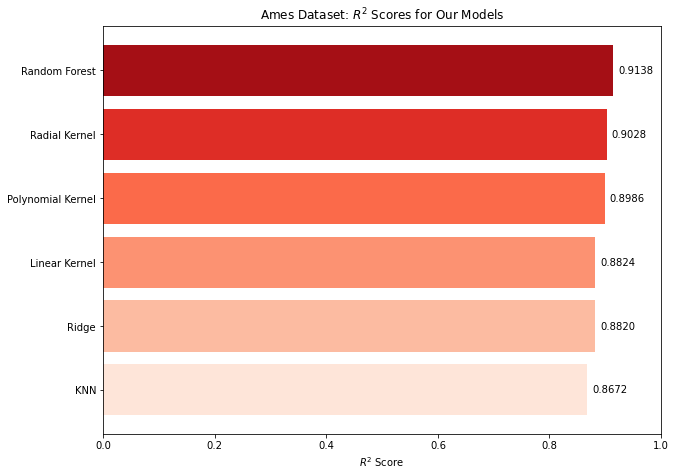

In [92]:
# Plotting R2 Scores for our models
fig, ax = plt.subplots(figsize=(10,7.5))
bars = ax.barh(score_labels, scores, color = bar_colors);
ax.bar_label(bars, fmt='%.4f', padding = 5);
ax.set(xlim = (0,1),
       xlabel ='$R^2$ Score',
       title = 'Ames Dataset: $R^2$ Scores for Our Models');

<a id='online'></a>
## Online Prediction

In [93]:
# index upto which we want to fit our scaler
n = X_ames.columns.get_loc('Yr Sold') + 1

In [94]:
from OnlineLR import OnlineLinearRegression
olr = OnlineLinearRegression(n_features = X_ames.shape[1], scale_index=n)
y_preds = []
T = X_ames.shape[0]

In [95]:
for t in range(X_ames.shape[0]):
    # Observe the sample at time t and make a prediction
    prediction = olr.predict(X_ames.iloc[t])
    # Store the prediction that we have made
    y_preds.append(prediction)
    # Calculate Loss and Update Weights
    olr.update_weights(y_ames.iloc[t], prediction)

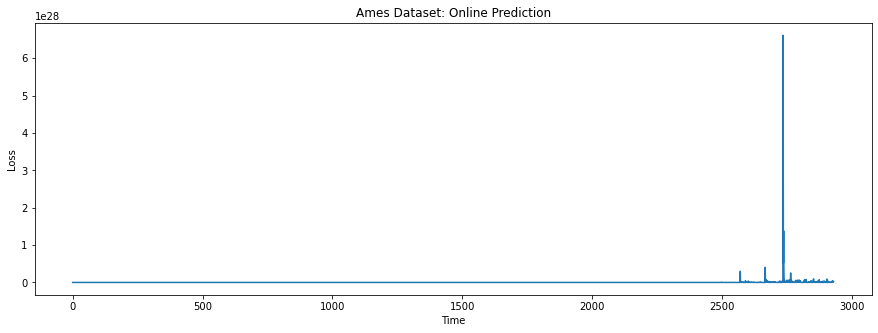

In [96]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(olr.losses)
ax.set(xlabel = 'Time',
       ylabel = 'Loss',
       title = 'Ames Dataset: Online Prediction');

In [97]:
olr.cumulative_loss_

1.3427072367480432e+29